# 7.3 Custom Charts
## 7.3.1 Combined Charts

Create a combined chart with a bar plot and a line plot sharing the same x-axis:

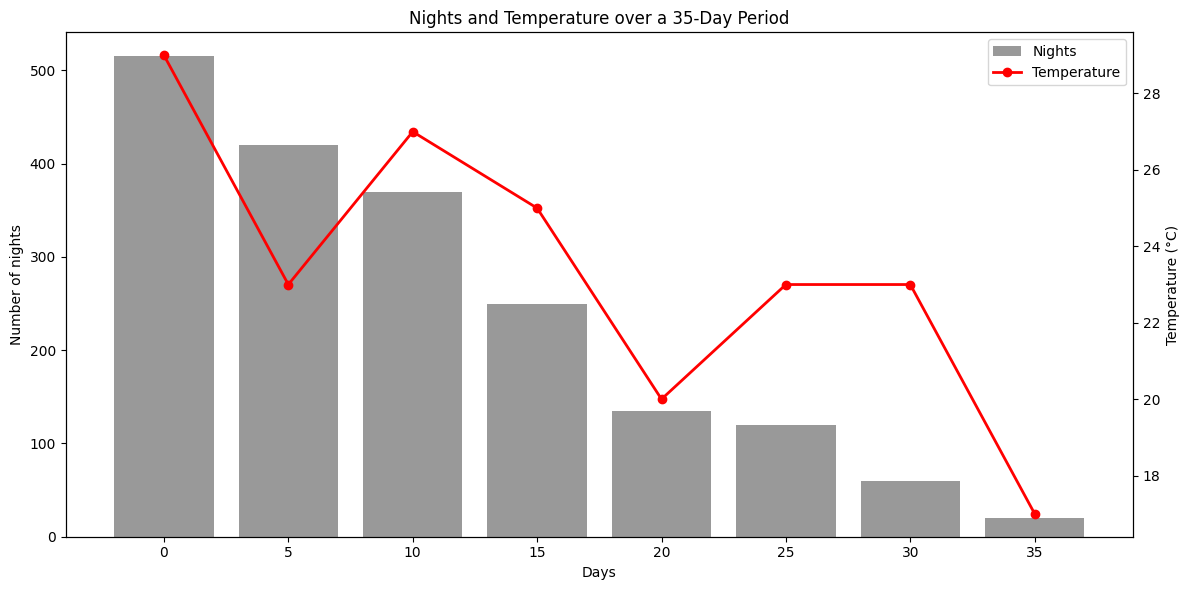

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
nights = [515, 420, 370, 250, 135, 120, 60, 20]
temp = [29, 23, 27, 25, 20, 23, 23, 17]
days = np.arange(0, 40, 5)  # 0, 5, 10, ..., 35

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for nights
ax1.bar(days, nights, align='center', alpha=0.8, color='grey', label='Nights', width=4)
ax1.set_xlabel('Days')
ax1.set_ylabel('Number of nights')

# Create a second y-axis for temperature
ax2 = ax1.twinx()

# Line plot for temperature
ax2.plot(days, temp, color='red', marker='o', linewidth=2, label='Temperature')
ax2.set_ylabel('Temperature (°C)')

# Title of the chart
plt.title('Nights and Temperature over a 35-Day Period')

# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Adjust layout
plt.tight_layout()

# Display the chart
plt.show()


Create a split view chart combining temperature line and nights bars:

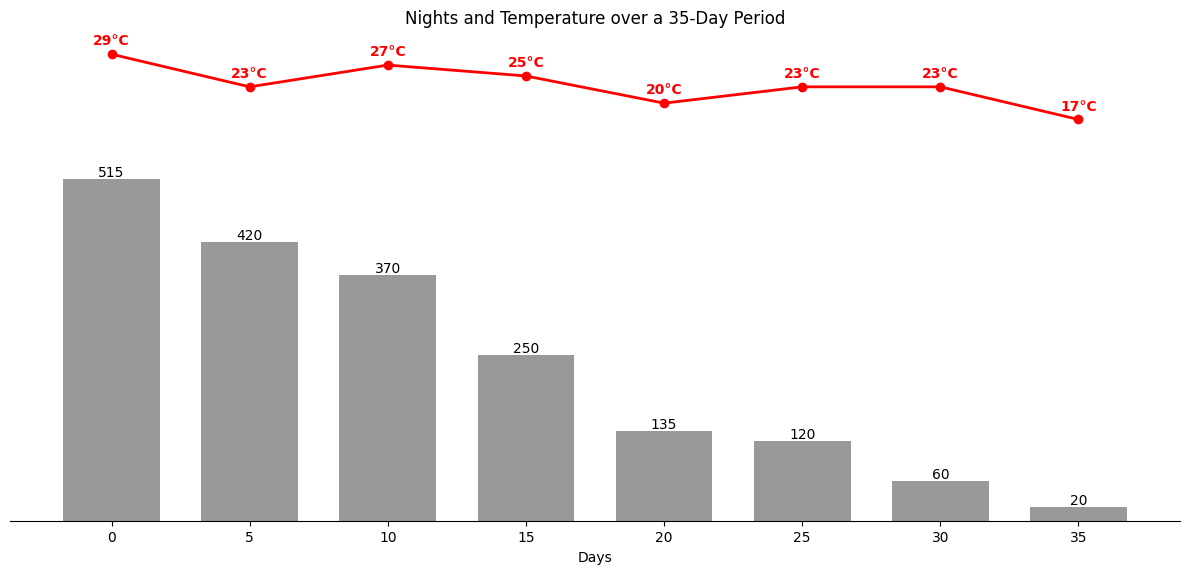

In [4]:
# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), height_ratios=[1, 3], sharex=True)
fig.subplots_adjust(hspace=0)  # Remove space between subplots

# Temperature plot (top)
ax1.plot(days, temp, color='red', marker='o', linewidth=2, label='Temperature')
ax1.set_ylim(min(temp) - 5, max(temp) + 5)  # Adjust y-axis limits
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)  # Remove x-axis
ax1.yaxis.set_visible(False)
ax1.xaxis.set_visible(False)  # Remove x-axis ticks

# Add values on the temperature curve points
for i, txt in enumerate(temp):
    ax1.annotate(f'{txt}°C', (days[i], temp[i]), xytext=(0, 5), 
                 textcoords='offset points', ha='center', va='bottom',
                 color='red', fontweight='bold')

# Bar chart for nights (bottom)
bar_width = 3.5
bars = ax2.bar(days, nights, align='center', alpha=0.8, color='grey', label='Nights', width=bar_width)

# Remove y-axis for the bar chart
ax2.yaxis.set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Add values on the bars
for block in bars:
    height = block.get_height()
    ax2.text(block.get_x() + block.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

# x-axis label (only for the bottom chart)
ax2.set_xlabel('Days')

# Title of the chart
fig.suptitle('Nights and Temperature over a 35-Day Period', y=0.95)

# Adjust layout
plt.tight_layout()

# Display the chart
plt.show()


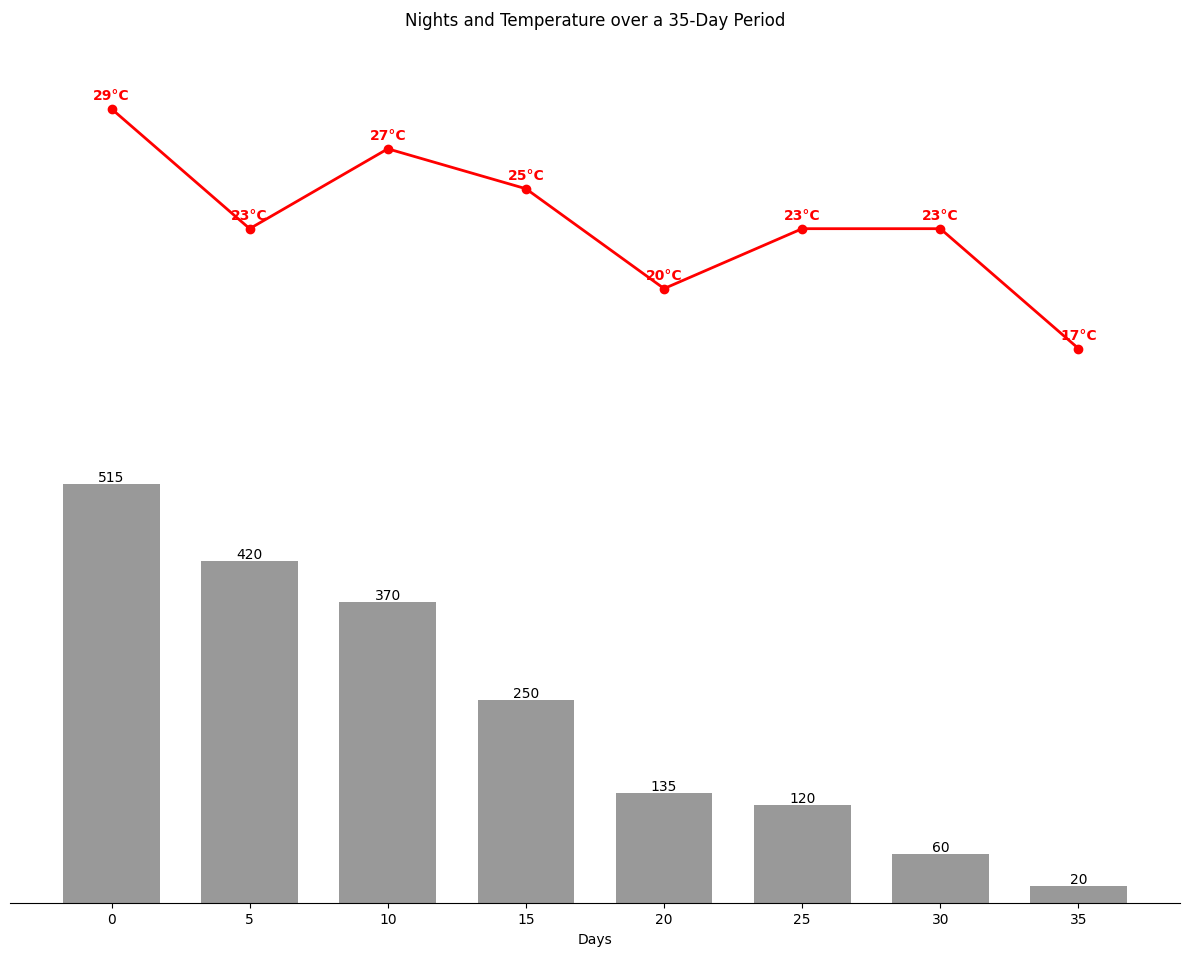

In [5]:
# Data
nights = [515, 420, 370, 250, 135, 120, 60, 20]
temp = [29, 23, 27, 25, 20, 23, 23, 17]
days = np.arange(0, 40, 5)  # 0, 5, 10, ..., 35

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), height_ratios=[2, 2], sharex=True)
fig.subplots_adjust(hspace=0)  # Remove space between subplots

# Temperature plot (top)
ax1.plot(days, temp, color='red', marker='o', linewidth=2, label='Temperature')
ax1.set_ylim(min(temp) - 5, max(temp) + 5)  # Adjust y-axis limits
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)  # Remove x-axis
ax1.yaxis.set_visible(False)
ax1.xaxis.set_visible(False)  # Remove x-axis ticks

# Add values on the temperature curve points
for i, txt in enumerate(temp):
    ax1.annotate(f'{txt}°C', (days[i], temp[i]), xytext=(0, 5), 
                 textcoords='offset points', ha='center', va='bottom',
                 color='red', fontweight='bold')

# Bar chart for nights (bottom)
bar_width = 3.5
bars = ax2.bar(days, nights, align='center', alpha=0.8, color='grey', label='Nights', width=bar_width)

# Remove y-axis for the bar chart
ax2.yaxis.set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Add values on the bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height}',
             ha='center', va='bottom')

# x-axis label (only for the bottom chart)
ax2.set_xlabel('Days')

# Title of the chart
fig.suptitle('Nights and Temperature over a 35-Day Period', y=0.95)

# Adjust layout
plt.tight_layout()

# Display the chart
plt.show()


## 7.3.2 Ribbon Chart

Create a ribbon chart showing market share evolution:

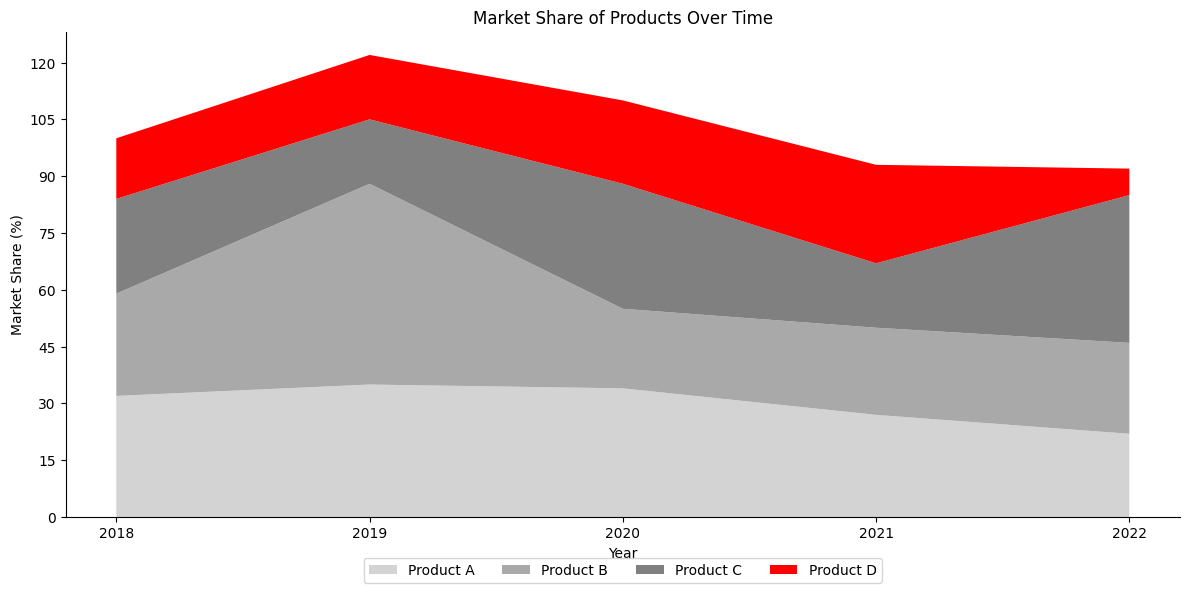

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator, FixedLocator

# Générer des données variées
np.random.seed(0)  # Pour la reproductibilité
years = [2018, 2019, 2020, 2021, 2022]
num_years = len(years)
num_products = 4

# Générer des données avec du bruit
data = {
    'Year': years,
    'Product A': np.random.randint(20, 50, size=num_years) + np.random.normal(0, 5, size=num_years).astype(int),
    'Product B': np.random.randint(15, 45, size=num_years) + np.random.normal(0, 5, size=num_years).astype(int),
    'Product C': np.random.randint(10, 40, size=num_years) + np.random.normal(0, 5, size=num_years).astype(int),
    'Product D': np.random.randint(5, 30, size=num_years) + np.random.normal(0, 5, size=num_years).astype(int)
}

# Assurer que les valeurs sont positives
for key in data:
    if key != 'Year':
        data[key] = np.maximum(data[key], 0)

df = pd.DataFrame(data)
df = df.set_index('Year')

# Trier les colonnes par valeur décroissante pour chaque année
for year in df.index:
    df.loc[year] = df.loc[year].sort_values(ascending=False)

# Définir la palette de couleurs
colors = {
    'Product A': '#D3D3D3',  # Light Gray
    'Product B': '#A9A9A9',  # Darker Gray
    'Product C': '#808080',  # Even Darker Gray
    'Product D': '#FF0000'   # Red
}

# Créer le graphique à rubans
fig, ax = plt.subplots(figsize=(12, 6))
ax.stackplot(df.index, df.T.values, labels=df.columns, colors=[colors[col] for col in df.columns])

# Mise en forme du graphique
plt.title('Market Share of Products Over Time')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')

# Configuration de l'axe des x pour afficher uniquement les années entières
ax.xaxis.set_major_locator(FixedLocator(df.index))  # Fixer les positions des ticks sur les années entières
ax.set_xticks(df.index)  # Définir les positions des ticks
ax.set_xticklabels(df.index)  # Définir les labels des ticks

# Configuration de l'axe des ordonnées pour afficher uniquement des entiers
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Déspiner les axes supérieurs et droits
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Déplacer la légende en bas
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=4)

plt.tight_layout()

plt.show()


## 7.3.3 Area Chart

Create a donut chart showing electricity access statistics:

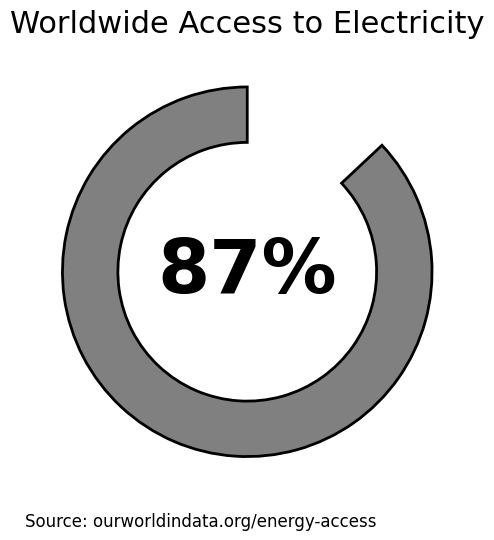

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
data = [87, 13]  
wedgeprops = {'width':0.3, 
              'edgecolor':'black', 
              'lw':2}  
patches, _ = ax.pie(data, 
					wedgeprops=wedgeprops, 
					startangle=90, 
					colors=['grey', 'white'])
patches[1].set_zorder(0)  
patches[1].set_edgecolor('white')
plt.title('Worldwide Access to Electricity', 
		  fontsize=22, 
		  loc='center')  
plt.text(0, 
         0, 
		 f"{data[0]}%", 
		 ha='center', 
		 va='center',
         weight="bold",
		 fontsize=54)  
plt.text(-1.2, 
         -1.3, 
		 "Source: ourworldindata.org/energy-access", 
		 ha='left', 
		 va='top', 
		 fontsize=12)

plt.show()